Nama  : Armadhani Hiro Juni Permana <br>
NIM   : 1301190234 <br>
Kelas : IF-43-02 <br>
MK    : Machine Learning <br> 
Tugas Besar Tahap 1 - Clustering 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
import random as rd
warnings.filterwarnings('ignore')

df = pd.read_csv("kendaraan_train.csv")
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
df.drop(['id', 'Tertarik'], axis = 1, inplace=True)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


## Info data

In [ ]:
df.shape

(285831, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), object(3)
memory usage: 21.8+ MB


In [ ]:
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


## Preprocessing

In [ ]:
df.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
df.fillna(method='ffill',inplace=True)
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0


In [ ]:
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0


In [ ]:
print(df['Jenis_Kelamin'].unique())
print(df['Umur_Kendaraan'].unique())
print(df['Kendaraan_Rusak'].unique())

['Wanita' 'Pria']
['< 1 Tahun' '> 2 Tahun' '1-2 Tahun']
['Tidak' 'Pernah']


In [ ]:
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, 1].values
labelencoder_x = LabelEncoder()
x = labelencoder_x.fit_transform(x)

y = df.iloc[:, 6].values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

z = df.iloc[:, 7].values
labelencoder_z = LabelEncoder()
z = labelencoder_z.fit_transform(z)

In [ ]:
df['Jenis_Kelamin'] = x
df['Umur_Kendaraan'] = y
df['Kendaraan_Rusak'] = z
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,10,30.0,1.0,33.0,1.0,1,10468,28029.0,152.0,97.0
1,28,48.0,1.0,39.0,0.0,0,8241,25800.0,29.0,158.0
2,1,21.0,1.0,46.0,1.0,1,15172,32733.0,160.0,119.0
3,38,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
4,30,50.0,1.0,35.0,0.0,1,17295,34857.0,88.0,194.0


Jenis_Kelamin : <br>
    0 = Pria  <br>
    1 = Wanita  <br>
Umur_Kendaraan :  <br>
    0 = 1-2 Tahun <br>
    1 = <1 Tahun <br>
    2 = >2 Tahun <br>
Kendaraan_Rusak : <br>
    0 = Pernah <br>
    1 = Tidak

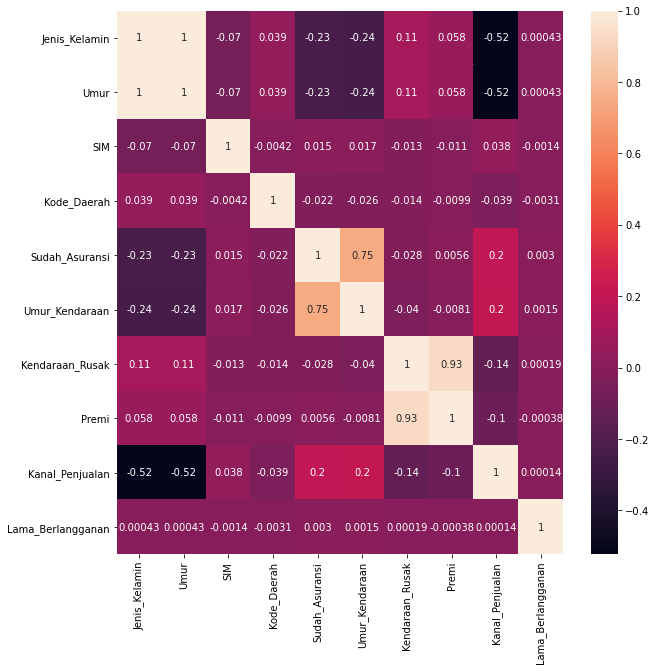

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g');


In [ ]:
df['Umur'].value_counts()

24.0    19375
23.0    18337
22.0    15745
25.0    15401
21.0    12245
        ...  
81.0       45
82.0       22
83.0       18
85.0        9
84.0        9
Name: Umur, Length: 66, dtype: int64

In [ ]:
df['Kanal_Penjualan'].unique()

array([152.,  29., 160., 124.,  88., 145.,  31.,  26., 156., 122.,   7.,
       154.,  25.,  12.,  11., 151., 133., 157.,  30.,  13.,   1.,  52.,
        23.,  14.,  16., 163.,   4., 138.,  55.,   8., 155., 125.,  24.,
        22., 120.,   3.,  94., 153., 131.,  60., 150.,  47.,  10., 158.,
        44.,  15., 159.,  18.,  21.,  37.,  19., 148., 113., 130.,  35.,
       147., 129.,  64.,  56.,  61., 136.,   9., 127., 119., 106., 111.,
       135.,  65.,  42., 116., 140.,  45., 132.,  48., 139.,  90.,  59.,
        66.,  54., 108.,  36.,  86.,  80.,  46.,  40.,  95.,  58.,  89.,
       109., 137.,  53.,  75., 128.,  97., 123., 103., 126., 107.,  91.,
       100., 110.,  78.,  68.,  38.,  63., 121.,  57.,  92.,  32.,  93.,
       134.,  49., 114.,  87., 118.,  98., 117., 146.,  76.,  96.,  73.,
        20.,  51.,  99.,  83.,  81.,  17.,  84.,  50.,  79.,  28., 105.,
       104.,  69.,  62., 144.,   2.,  74.,  39., 101.,  71., 112.,  33.,
        34.,  67.,  82., 102.,  27.,   6.,  70., 11

In [ ]:
# The data is big so scale the data with minmaxscaler
mimax = MinMaxScaler()
df[['Jenis_Kelamin','Umur','Kanal_Penjualan', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kode_Daerah', 'Premi', 'Lama_Berlangganan']] = mimax.fit_transform(df[['Jenis_Kelamin','Umur','Kanal_Penjualan', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kode_Daerah', 'Premi', 'Lama_Berlangganan']])
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.153846,1.0,0.634615,1.0,1.0,0.232040,0.047251,0.932099,0.301038
1,0.430769,0.430769,1.0,0.750000,0.0,0.0,0.182675,0.043104,0.172840,0.512111
2,0.015385,0.015385,1.0,0.884615,1.0,1.0,0.336311,0.056002,0.981481,0.377163
3,0.584615,0.584615,1.0,0.923077,0.0,1.0,0.000000,0.000000,0.759259,0.183391
4,0.461538,0.461538,1.0,0.673077,0.0,1.0,0.383371,0.059953,0.537037,0.636678
...,...,...,...,...,...,...,...,...,...,...
285826,0.046154,0.046154,1.0,0.076923,1.0,1.0,0.186842,0.043454,0.932099,0.716263
285827,0.015385,0.015385,1.0,0.884615,1.0,1.0,0.599738,0.078239,0.932099,0.138408
285828,0.046154,0.046154,1.0,0.961538,1.0,1.0,0.704165,0.087661,0.932099,0.747405
285829,0.738462,0.738462,1.0,0.134615,1.0,1.0,0.286880,0.051853,0.759259,0.899654


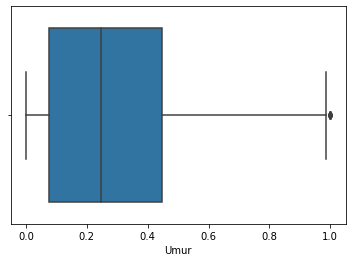

In [ ]:
sns.boxplot('Umur', data=df)
plt.show()

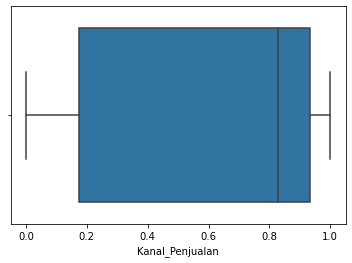

In [ ]:
sns.boxplot('Kanal_Penjualan', data=df)
plt.show()

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['Umur']))
print(finding_outlier(df['Kanal_Penjualan']))

30910     1.0
34745     1.0
50340     1.0
50341     1.0
61568     1.0
63378     1.0
126839    1.0
227529    1.0
283908    1.0
Name: Umur, dtype: float64
Series([], Name: Kanal_Penjualan, dtype: float64)


In [ ]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR  = Q3-Q1
df = df[~(df['Umur']>(Q1-(1.5*IQR))) | (df['Umur']<(Q3+(1.5*IQR)))]

In [ ]:
df.dropna(axis=0, inplace=True)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.153846,1.0,0.634615,1.0,1.0,0.232040,0.047251,0.932099,0.301038
1,0.430769,0.430769,1.0,0.750000,0.0,0.0,0.182675,0.043104,0.172840,0.512111
2,0.015385,0.015385,1.0,0.884615,1.0,1.0,0.336311,0.056002,0.981481,0.377163
3,0.584615,0.584615,1.0,0.923077,0.0,1.0,0.000000,0.000000,0.759259,0.183391
4,0.461538,0.461538,1.0,0.673077,0.0,1.0,0.383371,0.059953,0.537037,0.636678
...,...,...,...,...,...,...,...,...,...,...
285826,0.046154,0.046154,1.0,0.076923,1.0,1.0,0.186842,0.043454,0.932099,0.716263
285827,0.015385,0.015385,1.0,0.884615,1.0,1.0,0.599738,0.078239,0.932099,0.138408
285828,0.046154,0.046154,1.0,0.961538,1.0,1.0,0.704165,0.087661,0.932099,0.747405
285829,0.738462,0.738462,1.0,0.134615,1.0,1.0,0.286880,0.051853,0.759259,0.899654


In [ ]:
df_new = df[['Umur','Kanal_Penjualan']]
df_new

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.584615,0.759259
4,0.461538,0.537037
...,...,...
285826,0.046154,0.932099
285827,0.015385,0.932099
285828,0.046154,0.932099
285829,0.738462,0.759259


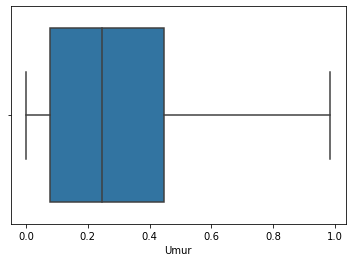

In [ ]:
sns.boxplot('Umur', data=df_new)
plt.show()

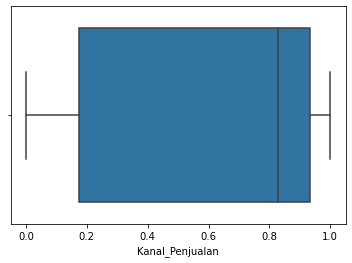

In [ ]:
sns.boxplot('Kanal_Penjualan', data=df_new)
plt.show()

In [ ]:
df_new.shape

(285822, 2)

In [ ]:
df.shape

(285822, 10)

In [1]:
# sns.pairplot(df)

## Clustering Using K-Means

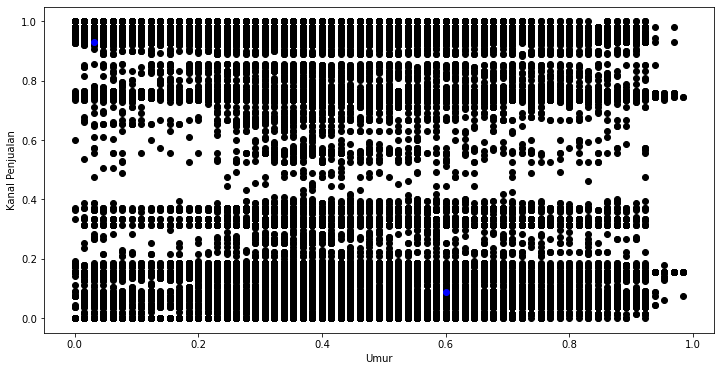

In [ ]:
X = df_new[["Umur","Kanal_Penjualan"]]

# Jumlah Cluster
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["Umur"],X["Kanal_Penjualan"],c='black')
plt.scatter(Centroids["Umur"],Centroids["Kanal_Penjualan"],c='blue')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.show()

Dari representasi data clustering sebelumnya terdapat dua centroids yang diambil secara random kemudian semua data dialokasikan ke cluster terdekat, dan juga prosesnya diulangi secara terus menerus hingga tidak ada perubahan pada titik centroidnya dan bisa disebut titik centroid sebelum sama dengan centroid sesudahnya. Dan dilakukannya perulangan yang tidak bisa ditentukan iterasinya karena perulangan ini akan berhenti apabila titik centroid yang random pada data sebelum clustering tidak berubah.

In [ ]:
diff = 1
j=0

while(diff!=0):
    new=X
    i=1
    for index1,row_c in Centroids.iterrows():
        Y=[]
        for index2,row_d in new.iterrows():
            nd1 =(row_c['Umur']-row_d['Umur'])**2
            nd2=(row_c["Kanal_Penjualan"]-row_d["Kanal_Penjualan"])**2
            nd=np.sqrt(nd1+nd2)
            Y.append(nd)
        X[i]=Y
        i=i+1

    hasil2=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        hasil2.append(pos)
    X["Cluster"]=hasil2
    Centroids_new = X.groupby(["Cluster"]).mean()[['Umur',"Kanal_Penjualan"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Umur'] - Centroids['Umur']).sum() + (Centroids_new["Kanal_Penjualan"] - Centroids["Kanal_Penjualan"]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[['Umur',"Kanal_Penjualan"]]

-0.050902110921609095
-0.018096186449812895
-0.0003144457013251334
0.0


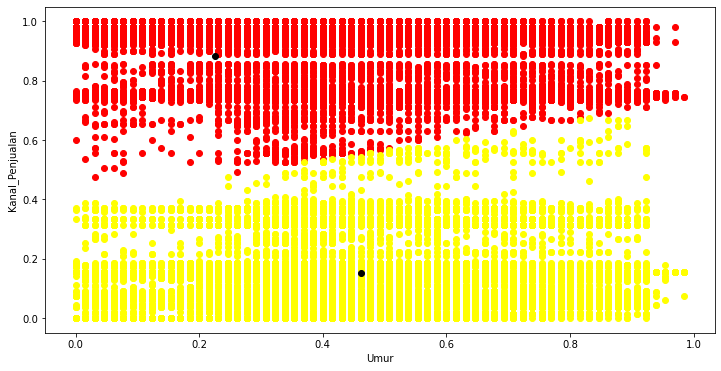

In [ ]:
color=['red','yellow']
plt.figure(figsize=(12,6))
for i in range(K):
    df_new=X[X["Cluster"]==i+1]
    plt.scatter(df_new['Umur'],df_new["Kanal_Penjualan"],c=color[i])
plt.scatter(Centroids['Umur'],Centroids["Kanal_Penjualan"],c='black')
plt.xlabel('Umur')
plt.ylabel("Kanal_Penjualan")
plt.show()

Hasil visualisasi akhir dari clustering ini dapat dilihat pada gambar diatas. Terlihat bahwa k = 2 tidak efektif digunakan karena adanya pengelompokan data yang tidak seharusnya (tidak sesuai). Maka untuk mengetahuinya kita bisa menggunakan evaluasi dengan menggunakan Elbow Method.

## Evaluate using Elbow Method

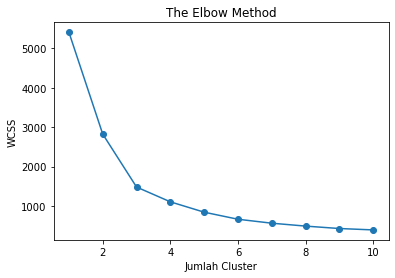

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Hasil dari Elbow Method didapatkan bahwa clustering terbaik berjumlah 3 buah cluster, sehingga jumlah cluster yang seharusnya dan efektif berjumlah 3 cluster.

# Experiment

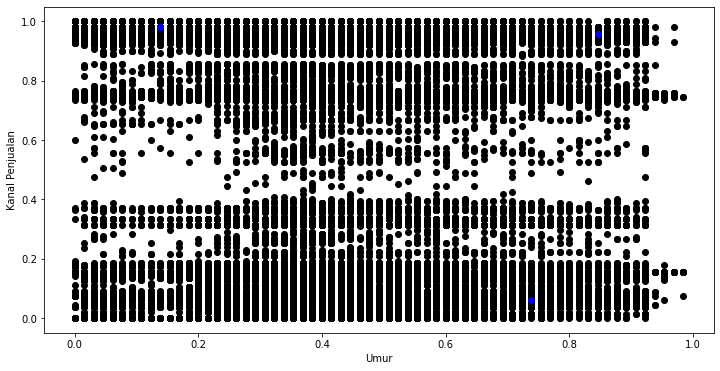

In [ ]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["Umur"],X["Kanal_Penjualan"],c='black')
plt.scatter(Centroids["Umur"],Centroids["Kanal_Penjualan"],c='blue')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    new=X
    i=1
    for index1,row_c in Centroids.iterrows():
        Y=[]
        for index2,row_d in new.iterrows():
            nd1=(row_c['Umur']-row_d['Umur'])**2
            nd2=(row_c["Kanal_Penjualan"]-row_d["Kanal_Penjualan"])**2
            nd=np.sqrt(nd1+nd2)
            Y.append(nd)
        X[i]=Y
        i=i+1

    hasil2=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        hasil2.append(pos)
    X["Cluster"]=hasil2
    Centroids_new = X.groupby(["Cluster"]).mean()[['Umur',"Kanal_Penjualan"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Umur'] - Centroids['Umur']).sum() + (Centroids_new["Kanal_Penjualan"] - Centroids["Kanal_Penjualan"]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[['Umur',"Kanal_Penjualan"]]

-0.09086360595461337
-0.06047503703842813
-0.026575266287164404
-0.011983959678617595
-0.008069495535426213
-0.0013070821544020617
-0.00031968940083595965
0.0


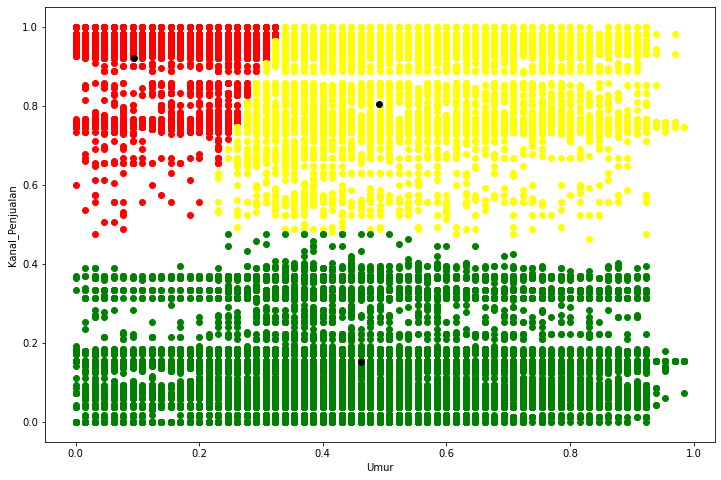

In [ ]:
color=['red','yellow','green','blue']
plt.figure(figsize=(12,8))
for i in range(K):
    df_new=X[X["Cluster"]==i+1]
    plt.scatter(df_new['Umur'],df_new["Kanal_Penjualan"],c=color[i])
plt.scatter(Centroids['Umur'],Centroids["Kanal_Penjualan"],c='black')
plt.xlabel('Umur')
plt.ylabel("Kanal_Penjualan")
plt.show()

## Conclusion

makjdDari hasil clustering diatas juga didapatkan seperti sebelumnya yang memiliki atribut Umur dan Kanal_Penjualan menghasilkan 2 buah cluster. Namun, setelah data sudah berhasil dicluster menjadi 2 buah, saya mencari jumlah cluster yang efektif menggunakan Elbow Method dan didapatkan jumlah cluster yang efektif adalah sebanyak 3 buah agar dapat dapat dikelompokkan sesuai dengan yang seharusnya.

Evaluasinya adalah agar jumlah cluster yang didapatkan lebih efektif maka akan lebih baik lagi jika mencari jumlah cluster yang efektif terlebih dahulu menggunakan Elbow Method.